<img src='./img/top.png'>
<h1>A study about aeronautics accidents</h1>
by Paulo Henrique Vasconcellos

<h1>A short introduction</h1>

For many years airplanes have been considered the second safest transport mean in the world - losing just to elevators. Traveling great distances in short time, those aircrafts have brought several advantaged for the world, both in commercial and regular application. Unfortunately, as any transport mean, aircrafts have their own count of tragedies. The last event envolving airplanes - to the publication date - <a href='http://globoesporte.globo.com/sc/futebol/times/chapecoense/acidente/'>was the accident envolving the brazilian soccer team Chapecoense and an LAMIA's aircraft</a>, which was transporting them to Colombia for a Championship. This tragedy brought back discussions and controversies about aircraft's security and human capacity during aeronautics occurrences.

<h1>About this study</h1>

In this presentation, I will be using open data available by CENIPA - Centro de Investigação e Prevenção de Acidentes aeronáuticos - or Aeronautical Accidents Investigation and Prevention Center. Such files contains informations about occurrences which envolved aircrafts in the last 10 years. You may access more updated data by visiting <a href='http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira'>Brazilian Open Data's official website</a>, or clicking in the download links below.
<br>
<br>
The following files was used in this study:
<br>
<br>
<a href='./dataset/occurrences.csv'>Occurrences.csv</a>: it contains the data of each occurrence recorded in the last 10 years. Occurrence ID, Date, Occurrence cause and Location are found in this dataset.
<br>
<br>
<a href='./dataset/aircrafts.csv'>Aircrafts.csv</a>: CSV file containing information about aircrafts envolved in registered occurrence. Here you will find the following type of data: Aircraft Model, Aircraft Type, Manufacturer, Fatalities, and so on.

<img src='./img/img_2.png'>
<h1>Questions to Answer:</h1>

Among other insights created through this project, I would like to answer the following questions:
<br>
<br>
<li>What are the major occurrence causes and, eventually, airplane falling?</li>
<li>How it has progressed in the last years? Was there fewer or more occurrences?</li>
<li>Which states did register more occurrences?</li>
<li>What kind of aircraft has shown more problems? Airplanes, jets, gliders?</li>
<li>What are the manufacturers that has shown more faults?</li>
<li>Is more likely the aircraft fail during the takeoff or during the landing? Is the cruise phase a risk moment?</li>
<li>Do regular trips have more occurrences than chartered flights?</li>
<li>Do regular trips have more occurrences than chartered flights?</li>

<h2>Importing libraries</h2>

In [13]:
%matplotlib inline
import pandas as pd #creation of DataFrames
import matplotlib.pyplot as plt #for ploting
import random

<h2>Reading the dataset</h2>

In [14]:
occurrences = pd.read_csv('./dataset/occurrences.csv', encoding='ISO-8859-1')
aircrafts = pd.read_csv('./dataset/aircrafts.csv', encoding='ISO-8859-1')

In [15]:
print('The \"occurrences.csv\" file contains ' + str(occurrences.shape[0]) + ' lines and ' + str(occurrences.shape[1]) + ' columns')

The "occurrences.csv" file contains 2027 lines and 20 columns


In [16]:
print('The \"aircrafts.csv\" file contains ' + str(aircrafts.shape[0]) + ' lines and ' + str(occurrences.shape[1]) + ' columns')

The "aircrafts.csv" file contains 2043 lines and 20 columns


<h2>Data Cleaning</h2>

The first step of this study will perform a proper data cleaning. Initially, let's verify how the dataset "occurrences.csv" is showed.

In [17]:
occurrences.head(5)

,Unnamed: 0,occurrence_id,classification,type of occurrence,localization,fu,country,aerodrome,occurrence_day,time,under_investigation,investigating_command,investigation_status,report_number,published_report,publication_day,recommendation_amount,aircrafts_involved,takeoff,extraction_day
0,0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,SJOG,2013-05-05,11:00:00,UNKNOWN,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,SSKW,2013-11-25,12:32:00,YES,SERIPA-7,FINISHED,NaN,1.0,2014-04-07,0,1,NaN,2016-07-30
2,2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,****,2008-08-07,15:10:00,YES,SERIPA-7,FINISHED,NaN,1.0,2016-07-07,0,1,1.0,2016-07-30
3,3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,****,2011-08-11,17:00:00,YES,SERIPA-7,FINISHED,NaN,1.0,2012-09-20,4,1,NaN,2016-07-30
4,4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,****,2009-12-28,17:30:00,YES,SERIPA-5,IN PROGRESS,UNDEFINED,NaN,NaN,0,1,NaN,2016-07-30


You can see above the file structure. As I said previously, the "occurrences.csv" file contains 2027 lines and 19 columns. In another words, there are 2027 occurrences registries in the last 10 years.
<br>
<br>
Following our study, I would like to know how Python is identifing each column. Is Python treating the Occurrences ID as strings or integers? I don't know, but the ```dtypes``` command will gives us the answer.

In [18]:
occurrences.dtypes

Unnamed: 0                 int64
occurrence_id              int64
classification            object
type of occurrence        object
localization              object
fu                        object
country                   object
aerodrome                 object
occurrence_day            object
time                      object
under_investigation       object
investigating_command     object
investigation_status      object
report_number             object
published_report         float64
publication_day           object
recommendation_amount      int64
aircrafts_involved         int64
takeoff                  float64
extraction_day            object
dtype: object

You may note that each lines below the ```dtypes``` command represents a column in our dataset, 19 columns in total. In the right hand we can see how Python is treating each column. For example, we can see that ```occurrence_id``` is been treating as an integer (int64). Regardless of that, ```localization```, ```fu``` and ```classification``` are treated as strings, or objects in this case.
<br>
<br>
We need to handle some columns which we are going to work with. First of all, let's show each one of them using the ```columns``` command.

In [19]:
#Columns of the occurrences.csv file
occurrences.columns

Index(['Unnamed: 0', 'occurrence_id', 'classification', 'type of occurrence',
       'localization', 'fu', 'country', 'aerodrome', 'occurrence_day', 'time',
       'under_investigation', 'investigating_command', 'investigation_status',
       'report_number', 'published_report', 'publication_day',
       'recommendation_amount', 'aircrafts_involved', 'takeoff',
       'extraction_day'],
      dtype='object')

"Occurrences.csv" is a big file, after all, it has many columns and lines which contains details about each occurrence. However, we don't need of every columns for this study. In order to make this presentation clearer and cleaner, let's remove some columns that we will not use, such as ```report_number```, ```investiganting_command``` and ```aerodrome```.

In [20]:
#Removing irrelevant columns
occurrences.drop(['Unnamed: 0','aerodrome','time','under_investigation','investigating_command',
                 'published_report','publication_day','recommendation_amount',
                 'aircrafts_involved','takeoff','extraction_day', 'report_number'], axis = 1, inplace = True)

Now we have all columns which will be used with this dataset, but I am stil not happy about how they are named in this file. For example: we could change the occurrence_id column to Occurrence ID, in order to make the reading clear. That's exactly what we are going to do.

In [25]:
#Renaming columns of occurrences.csv
occurrences.columns = ['OCCURRENCE ID','CLASSIFICATION','TYPE OF OCCURRENCE','LOCALIZATION',
                      'FU','COUNTRY','OCCURRENCE DAY','INVESTIGATION STATUS']

#Inserindo coluna para contagem
#ocorrencia['CONTAGEM'] = 1

Also, let's remove some lines where the field Occurrence ID is invalid.

In [27]:
#Droping lines where the Occurrence ID is invalid
occurrences['OCCURRENCE ID'].dropna(axis = 0, inplace = True)

Let's see the new DataFrame

In [29]:
occurrences.head()

,OCCURRENCE ID,CLASSIFICATION,TYPE OF OCCURRENCE,LOCALIZATION,FU,COUNTRY,OCCURRENCE DAY,INVESTIGATION STATUS
0,47965,ACCIDENT,ENGINE FAILURE DURING THE FLIGHT,ARIQUEMES,RO,BRAZIL,2013-05-05,NaN
1,50313,SERIOUS INCIDENT,LANDING WITHOUT LANDING GEAR,CACOAL,RO,BRAZIL,2013-11-25,FINISHED
2,34078,ACCIDENT,LOSS OF CONTROL ON THE GROUND,CEREJEIRAS,RO,BRAZIL,2008-08-07,FINISHED
3,44988,ACCIDENT,SLOW LANDING,AMAJARI,RR,BRAZIL,2011-08-11,FINISHED
4,38855,ACCIDENT,LOSS OF CONTROL IN THE AIR,ACEGUÁ,RS,BRAZIL,2009-12-28,IN PROGRESS


<h1>Data Visualization</h1>

Alright, our DataFrame is cleaned and presentable. Now, we are going to get some insights about that.

My first question is:<br><br>
<b>How is classified an occurrence? What is the frequency for each category?</b>

In [30]:
#Colors for plotting
colors = [['#0D47A1','#1565C0','#1976D2','#1E88E5','#2196F3'],
          ['#311B92','#512DA8','#673AB7','#9575CD','#B39DDB'],
          ['#1B5E20','#388E3C','#4CAF50','#81C784','#66BB6A'],
          ['#E65100','#EF6C00','#F57C00','#FB8C00','#FF9800'],
          ['#3E2723','#4E342E','#5D4037','#6D4C41','#795548'],
          ['#BF360C','#D84315','#E64A19','#F4511E','#FF5722'],
          ['#880E4F','#AD1457','#C2185B','#D81B60','#E91E63']
         ]

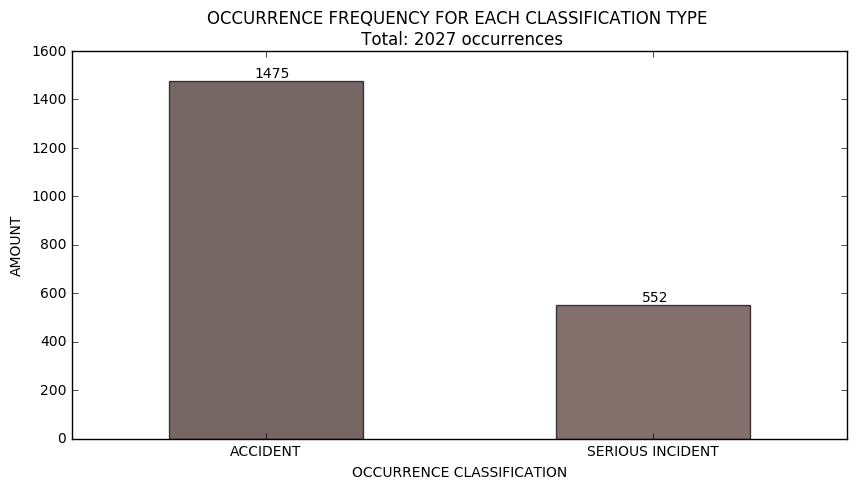

In [42]:
classification = occurrences['CLASSIFICATION'].value_counts().plot(kind='bar', figsize=(10,5), color=random.choice(colors), alpha=.7)

for p in classification.patches:
    b=p.get_bbox()
    classification.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.xticks(rotation=0)
plt.xlabel('OCCURRENCE CLASSIFICATION')
plt.ylabel('AMOUNT')
plt.title('OCCURRENCE FREQUENCY FOR EACH CLASSIFICATION TYPE \n Total: ' + str(occurrences.shape[0]) + ' occurrences')
plt.show()

As we can see in the plot above, occurrences are divided in two main categories: Accident and Serious Incident. This dataset is about aircraft occurrences from the last 10 years, but it does not mean that all of them are Serious Incidents, or that there was fatalities.

Now that I know how occurrences are classified, I would like to answer another question:

<b>How many types of occurrence there are and what was the frequency of each one?</b>

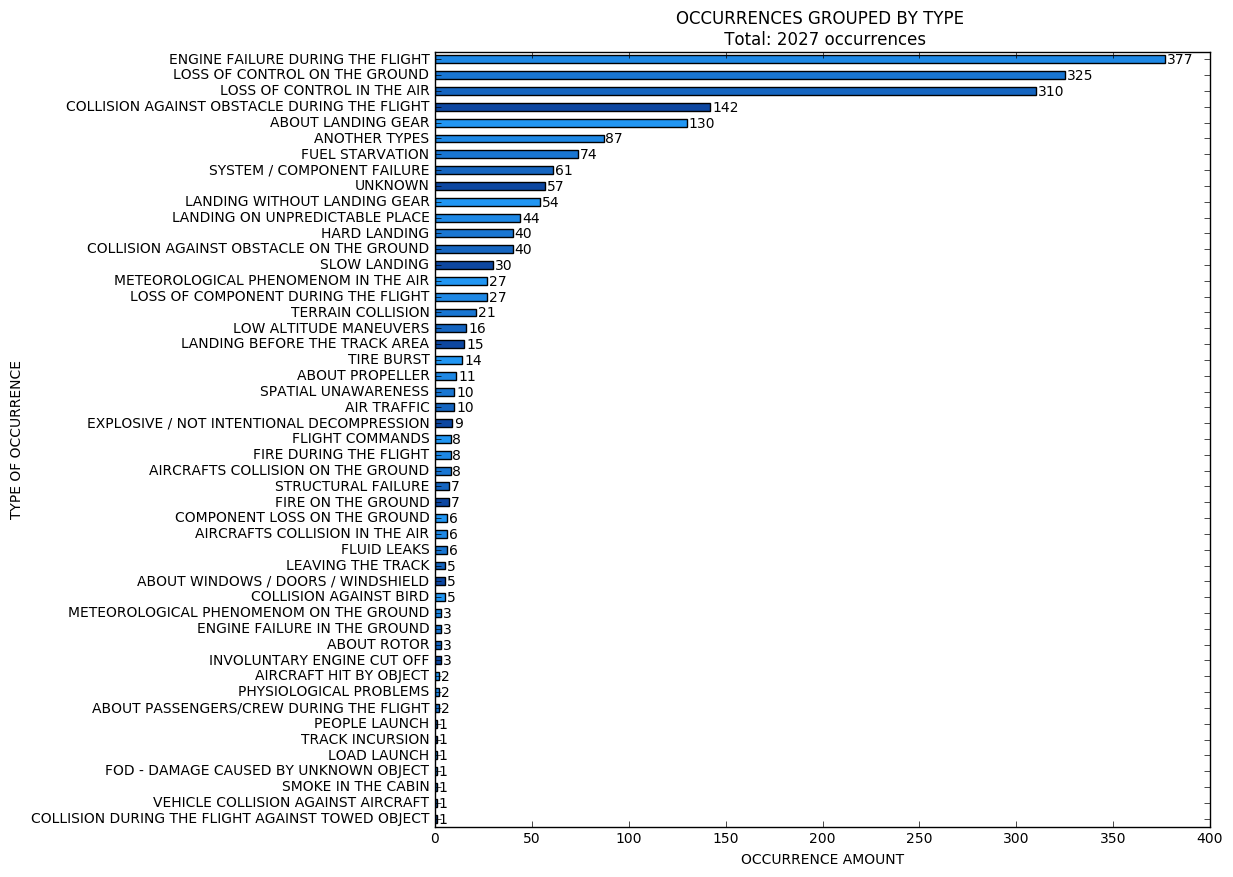

In [43]:
ax = occurrences['TYPE OF OCCURRENCE'].value_counts().sort_values().plot(kind='barh', color=random.choice(colors), figsize=(10,10))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('OCCURRENCES GROUPED BY TYPE \n Total: ' + str(occurrences.shape[0]) + ' occurrences')
plt.ylabel('TYPE OF OCCURRENCE')
plt.xlabel('OCCURRENCE AMOUNT')
plt.show()

According to the data shown above, the major occurrence cause is due engine failure during the flight, followed by loss of controle on the ground. 

De acordo com os dados desse <i>plot</i>, as maiores causas de ocorrências são devidas a falhas de motor durante o vôo, seguida por perda de controle em solo e perda de controle em vôo. Embora tais causas nos remetam a falha humana na operação, não podemos levar isto como uma regra. Uma perda de controle em vôo pode dever-se desde incompetência técnica até falha em dispositivos como o radar. Todavia, a escala destes três principais motivos é uma causa a se preocupar.

Seguindo nosso estudo, vamos responder a próxima pergunta:<br><br>
<b>Como tem sido a progressão desses últimos anos? Tiveram menos ocorrências ou mais?</b>

In [ ]:
plotagem_data = ocorrencia.copy()
plotagem_data['DIA DA OCORRÊNCIA'] = plotagem_data['DIA DA OCORRÊNCIA'].apply(lambda x: x.replace(x,x[0:4]))
plotagem_data.groupby('DIA DA OCORRÊNCIA')['CONTAGEM'].sum().plot(color='purple', figsize=(12,5), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIA AO LONGO DOS ANOS \n Total: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('ANO REFERÊNCIA')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

A progressão de ocorrências aéres nos últimos 10 anos tem crescido assustadoramente. Enquanto em 2006 tivemos menos que 130 ocorrências, em 2012 esse número subiu para quase 300! Vale lembrar que, embora em 2007 tenham ocorridos menos casos envolvendo aviões, este foi o ano do maior desastre aéreo já ocorrido no Brasil: o acidente do avião da TAM, que matou 194 pessoas. Mas, vamos deixar essa parte mais a frente deste estudo. A boa notícia é que, de 2012 até agora o número de ocorrências tem diminuído.

E quanto aos estados? <b>Quais foram os que mais registraram ocorrências?</b>

In [ ]:
ax_estado =  ocorrencia.groupby('UF')['CONTAGEM'].sum().plot(kind='bar', color=random.choice(colors), figsize=(11,5))

plt.xlabel('ESTADO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.title('QUANTIDADE DE OCORRÊNCIAS POR ESTADO\nTotal: ' + str(ocorrencia['CONTAGEM'].sum()) + ' ocorrências')
plt.xticks(rotation=0)
plt.show()

O Estado de São Paulo foi o que mais teve ocorrências de 2006 a 2015. O número preocupante é maior do que os encontrados em todos os estados da região sudeste juntos! É de conhecimento que São Paulo é o estado com mais aeroportos do Brasil o que nos permitiria cogitar que este é o motivo de tantas ocorrências, não obstante, outros estados com muitos aeroportos como: Goiás, Maranhão, Mato Grosso e Minas Gerais obtiveram um <i>score</i> consideravelmente menor que o estado de São Paulo.

Você deve ter percebido duas informações diferentes nesse gráfico: os "estados" \*\*\*\ e EX. Este último, por exemplo, representa ocorrências registradas fora do território brasileiro, mas com aeronaves nacionais.

Já os três asterísticos representam locais que não tiveram sua localização identificadas (vide tabela abaixo), como a ocorrência 49474, que ocorreu em águas internacionais.

In [ ]:
#Duas ocorrências em que não tiveram locais determinados
ocorrencia[ocorrencia['UF'] == '***']

<h1>Analisando o dataset de aeronaves</h1>

Agora iremos partir para o segundo conjunto de dados deste estudo: o dataset de aeronaves. Este arquivo possui informações acerca dos veículos que estavam envolvidos nas ocorrências registradas dos últimos anos. Primeiro, realizarei a fase de limpeza dos dados (semelhante ao feito anteriormente), depois, irei trazer alguns <i>Insights</i> a partir da visualização dos dados. Vamos começar?

<h2>Limpeza dos Dados (Data Cleaning)</h2>

O arquivo "aeronave.csv" possui 24 colunas com informações sobre os aviões. Muitos desses dados não são de grande valia para esse estudo, como matricula da aeronave, seu código, peso máximo na decolagem e categoria de registro. Inicialmente, irei removê-los do DataFrame para melhor visualização, depois, converterei colunas indevidas com seu respectivo tipo de arquivo, seguido por processos como renomeação de colunas e eliminação de dados nulos.

Abaixo, apresento as primeiras linhas do arquivo.

In [ ]:
aeronave.head()

A seguir eu retiro as colunas que não me interessam para este projeto. Perceba no bloco abaixo como fica a tabela sem esses dados.

In [ ]:
aeronave.drop(['codigo_aeronave','matricula','codigo_operador','peso_maximo_decolagem',
               'categoria_registro', 'origem_voo', 'destino_voo', 'dia_extracao'], axis = 1, inplace = True)

aeronave.head()

Feita a exclusão, é hora de visualizar como o Python está tratando cada coluna.

In [ ]:
aeronave.dtypes

Um primeiro ponto que me incomodou foi o fato dele estar tratando as colunas de quantidades de assentos, ano de fabricação, quantidade de motores e quantidade de fatalidades como valores flutuantes (float64), ou seja, com pontos decimais. Ora, não existe, por exemplo, aeronaves com dois motores e meio (2,5), tampouco morrem durante um acidente três pessoas e meia (3,5). Mais a frente, durante a fase de visualização dos dados, isso será um problema, portanto, vamos tratá-lo.

Primeiro eu crio duas funções: ```convert_na``` e ```convert_dtype```. A primeira, irá procurar por valores nulos nas linhas das colunas especificadas no momento do chamado da função, e irá preenche-las com o numeral 0. Já a segunda função irá converter esse DataFrame atualizado para um tipo específico de formato (em nosso caso, numeros inteiros). Confira abaixo maiores detalhes de cada função.

In [ ]:
'''
A função convert_na possui dois argumentos: um DataFrame e sua coluna. 
Tal Series terá todos os seus valores nulos (NaN) atualizados para o numeral 0.
'''

def convert_na(dataframe, column):
    for i in column:
        dataframe[i].fillna(0, inplace = True)

convert_na(aeronave,['quantidade_fatalidades','quantidade_motores','ano_fabricacao','quantidade_assentos'])

In [ ]:
'''
A função convert_dtype possui três argumentos: um DataFrame, uma coluna (Series) e o dtype que o usuário deseja alterar.
Para cada Series declarada na função, ela irá converter tal coluna para o dtype desejado
'''

def convert_dtype(dataframe, column, dtype):
    for i in column:
        dataframe[i] = dataframe[i].astype(dtype)

convert_dtype(aeronave,['quantidade_motores','quantidade_assentos','ano_fabricacao','quantidade_fatalidades'],int)

Declaradas as funções e realizada as devidas alterações nas colunas, vamos ver como o Python interpretará tais dados agora.

In [ ]:
#Dtypes de float alterados para int
aeronave.dtypes

Como desejei, as colunas foram alteradas com sucesso de decimais para números inteiros.

O próximo passo é renomear todas as colunas restantes nesse DataFrame para podermos ter uma visualização melhor. Aproveito para converter todos os valores nulos para a sentença "NÃO IDENTIFICADO". Isso facilitará o entendimento. O último <i>statement</i> do código irá incluir uma nova coluna no DataFrame: CONTAGEM, a qual irei atribuir o valor único de 1 para poder realizar alguns cálculos com mais facilidade.

In [ ]:
aeronave.columns = ['CÓDIGO DA OCORRÊNCIA','EQUIPAMENTO','FABRICANTE','MODELO','TIPO DE MOTOR','QUANTIDADE DE MOTORES',
                    'QUANTIDADE DE ASSENTOS','ANO DE FABRICAÇÃO','PAÍS DE REGISTRO','CATEGORIA DE AVIÃO','FASE DE OPERAÇÃO',
                    'TIPO DE OPERAÇÃO','NÍVEL DE DANO','QUANTIDADE DE FATALIDADES']
aeronave = aeronave.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
aeronave['CONTAGEM'] = 1

Vamos visualizar como ficou o novo DataFrame.

In [ ]:
#DataFrame alterado
aeronave.head()

Um fato me chamou a atenção neste arquivo de aeronaves: seu tamanho é maior que o arquivo de ocorrências. Levando em consideração que para cada aeronave há uma ocorrência, o que explicaria esse detalhe?

Para termos certeza de que os DataFrames ```ocorrencia.csv``` e ```aeronave.csv``` são diferentes, vamos conferir no código.

In [ ]:
#Verificando se os dataframes são iguais
aeronave['CÓDIGO DA OCORRÊNCIA'].equals(ocorrencia['CÓDIGO DA OCORRÊNCIA'])

Sim, de fato são diferentes. A explicação para este fato é de que uma ocorrência que envolveu mais de uma aeronave terá o mesmo número de ocorrência para ambos. Vimos no gráfico acima que há casos onde aeronaves se chocaram em vôo. Para ambas foi aberta o mesmo número de ocorrências.

Vamos através do código abaixo, descobrir quantas ocorrências nós temos sob o mesmo código.

In [ ]:
#Pegando linhas duplicadas no DataFrame
ocorrencias_duplicadas = aeronave[aeronave['CÓDIGO DA OCORRÊNCIA'].duplicated()].reset_index(drop=True)
ocorrencias_duplicadas.drop('CONTAGEM', axis = 1, inplace = True)
print('Há ' + str(ocorrencias_duplicadas.shape[0]) + ' ocorrências duplicadas.')

Vamos visualizar algumas das ocorrências de mesmo número

In [ ]:
ocorrencias_duplicadas.head(6)

<h1>Visualização dos Dados (Data Visualization)</h1>

Agora que tratamos e limpamos nosso <i>dataset</i>, é hora de visualizarmos os dados. Em nosso conjunto, existe a informação sobre o tipo de motor que a aeronave utiliza, sendo assim, a primeira pergunta que desejo responder é: <br><br><b>Qual tipo de motor mais gerou ocorrências nos últimos 10 anos?</b>

In [ ]:
ax = aeronave.groupby('TIPO DE MOTOR')['CONTAGEM'].sum().sort_values().plot(kind='bar', color=random.choice(colors), figsize=(11,5))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))

plt.title('QUANTIDADE DE OCORRÊNCIAS AGRUPADAS\nPOR TIPO DE MOTOR DE AERONAVE\nTotal: '+str(aeronave['CONTAGEM'].sum())+' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

Os motores a pistão reinam com as maiores quantidades de ocorrências geradas. Esse motor é um dos mais antigos (e até usados) motores de aeronave no mundo, muito comum em aviões monomotores. Além do baixo custo, eles são semelhantes aos motores de carro, mas tratados com os padrões de qualidade e confiança da aeronáutica, funcionando muito bem em baixar altitudes.

O segundo e terceiro lugar ficaram para os motores de Turboeixo e Turboélice. Assim como o motor de pistão, o Turboélice é caracterizado pela hélice que fica a frente do avião, utilizando a famosa Lei da Ação e Reação para movimentar a aeronave, contudo, sua diferença está em utilizar pequenos jatos para realizar tal funcionamento.

Próxima pergunta:
<br>
<b>Será que ocorrências envolvendo aviões aparecem em menor frequência do que para helicópter e outras aeronaves?</b>
<br>

In [ ]:
ax = aeronave.groupby('EQUIPAMENTO')['CONTAGEM'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(11,5), color=random.choice(colors))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS POR TIPO DE AERONAVE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=45)
plt.show()

Definitivamente, ocorrências envolvendo aviões surgem com muito mais frequência do que para helicópteros. Na verdade, a quantidade total de ocorrências de aviões é maior do que a soma de todos os outros tipos de aeronave. Até mesmo dirigíveis aparecem neste <i>dataset</i>!

Se temos tantas quantidades de ocorrências registradas nesses anos, <b>quais são as fabricantes que mais aparecem nos problemas relatados?</b>

In [ ]:
ocorrencias_fabricante = aeronave.groupby('FABRICANTE')['CONTAGEM'].sum().sort_values(ascending = False)
ocorrencias_fabricante.head(10).plot(kind='barh', figsize=(10,5), color=random.choice(colors), grid=True)

plt.title('QUANTIDADE DE OCORRÊNCIAS POR FABRICANTE\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS NOS ÚLTIMOS 10 ANOS')
plt.show()

A fabricante brasileira Neiva Industria ocupa 19,6% das causas de ocorrências envolvendo aeronaves, seguida pela Cessna Aircraft e Piper Aircraft. A Neiva Industria Aeronáutica tem estado há 50 anos no mercado produzindo, principalmente, aviões de motores a pistão voltados para agricultura. Já a Cessna Aircraft é uma empresa americana, sediada no Kansas, que possui um inventário mais abrangente de aeronaves, produzindo desde monomotores a aviões a jato.

A quantidade de ocorrências para essas duas fabricantes mostra a diferença gritante em relação as outras. A Neiva Industria, por exemplo, possui uma diferença próxima de 150% em relação ao terceiro lugar: a Piper Aircraft. Tais indicadores seriam uma boa forma de reavaliar o processo de montagem, manutenção e qualidade de peças dessas fabricantes.

Um outro questionamento que podemos fazer é:<br><br>
<b>Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?</b>

In [ ]:
categoria_aviao = aeronave.groupby('CATEGORIA DE AVIÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(11,7), color=random.choice(colors), alpha=.8, grid = True)

plt.title('QUANTIDADE DE OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS\nAGRUPADAS POR CATEGORIA DE AVIÃO')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()


Muitas pessoas tem medo de voar. Isso é fato, contudo, esses dados mostrados no gráfico acima mostram que esse medo pode ser diminuído. A esmagadora maioria de ocorrências registradas são atribuídas a aeronaves particulares, que podem ser desde monomotores e ultraleves até aviões particulares. O transporte Regular - aquele que companhias aéreas oferecem para o público em geral -, possui menos de 100 ocorrências nos últimos anos. Tais dados explicam o porquê da Neiva Industria ser uma das fabricantes que mais possuem ocorrência, já que a grande fatia desta escala é atribuida aos principais tipos de avião que ela produz.

Vamos agora olhar para o momento em que as ocorrências surgiram. Com isso, quero saber se é mais propício ocorrer um problema durante o pouso, decolagem ou outro momento da viagem.

In [ ]:
fase_de_operacao = aeronave.groupby('FASE DE OPERAÇÃO')['CONTAGEM'].sum().sort_values().plot(kind='barh', figsize=(11,7), color=random.choice(colors), grid = True)
plt.title('QUANTIDADE DE OCORRÊNCIAS POR FASE DE OPERAÇÃO\nTotal: ' + str(aeronave['CONTAGEM'].sum()) + ' ocorrências')
plt.xlabel('QUANTIDADE DE OCORRÊNCIAS')
plt.show()

De fato, o momento do pouso é um dos mais importantes da viagem. Cerca de 400 ocorrências, das mais de 2000 registradas ocorreram nesta fase. Contudo, vale ressaltar que a decolagem está consideravelmente próxima ao pouso, fazendo dela uma operação delicada também. Já a fase de cruzeiro, que se encontra em terceira posição, é o momento da viagem em si, quando o avião está trafegando da origem ao destino.

Como já disse anteriormente, nem toda ocorrência gerada resulta em fatalidades e danos na aeronave. Uma ocorrência, como o nome já diz, se refere ao fato de que algum evento não previsto ocorreu.

Não obstante, esta é uma pergunta interessante a se responder. Afinal, <b>quais são os tipos de danos que podem ocorrer a uma aeronave? Qual a frequência?</b>

In [ ]:
tipo_de_dano = aeronave.groupby('NÍVEL DE DANO')['CONTAGEM'].sum().sort_values().plot(kind='bar', figsize=(11,5), color=random.choice(colors), grid = True)

plt.title('OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS AGRUPADAS\nPOR TIPO DE DANO')
plt.ylabel('QUANTIDADE DE OCORRÊNCIAS')
plt.xticks(rotation=0)
plt.show()

Danos substanciais são aqueles que danificaram significantemente a aeronave. Há casos em que a fuselagem foi danificada, uma asa, turbina, hélice, dentre outros. Este tipo é o que mais surgiu durante esses anos, seguido por danos em que a aeronave ficou totalmente destruída.

Por fim, quero saber em quantas ocorrências houveram fatalidades. Para ter essa informação, agruparei os casos onde pessoas morreram por quantidade, a fim de saber não só quantas fatalidades houveram nesta última década, mas também a sua frequência.

In [ ]:
fatalidades_maior_que_zero = aeronave[aeronave['QUANTIDADE DE FATALIDADES'] > 0]
fatalidades = fatalidades_maior_que_zero.groupby('QUANTIDADE DE FATALIDADES')['CONTAGEM'].sum().plot(kind='bar', figsize=(11,5), color=random.choice(colors))

for p in fatalidades.patches:
    b=p.get_bbox()
    fatalidades.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 2))
    
plt.title('QUANTIDADE DE OCORRÊNCIAS DOS ÚLTIMOS 10 ANOS AGRUPADAS\nPOR QUANTIDADE DE FATALIDADES')
plt.ylabel('QUANTIDADE DE OCORRÊNCIA')
plt.xticks(rotation=0)
plt.show()

Para esse gráfico, ignorei casos onde não houveram fatalidades, que felizmente, é a grande maioria. Os dados restantes geraram o gráfico acima, que mostra que a maior frequência de mortes é atribuída a apenas uma pessoa. Novamente, lembre-se que a maioria das ocorrências registradas são de aviões a pistão, aeronaves estas presentes na linha de produção da fabricante com mais ocorrências: a Neiva Industria. Aeronaves monomotores e ultraleves possuem uma quantidade de assentos bem limitada - cerca de um ou dois. Tais quantidades são justamente encontradas nas duas primeiras posições do gráfico.

Mas, dois casos me chamaram a atenção. Ao final do gráfico, é possível visualizar que há um caso onde morreram 154 pessoas e outro onde 199 fatalidades ocorreram. Sinceramente, não me lembrava de nenhum caso nos últimos anos envolvendo uma quantidade tão grande de mortes, sendo assim, decidi investigar.

Abaixo, você pode conferir as duas linhas onde essas ocorrências se encontram na tabela.

In [ ]:
piores_acidentes = aeronave[aeronave['QUANTIDADE DE FATALIDADES'] > 100]
piores_acidentes

Após uma pesquisa, lembrei-me de qual caso foi este. Trata-se do desastre envolvendo um Airbus A-320 no ano de 2007 em São Paulo, quando este tentou, sem sucesso, pousar na pista principal do aeroporto de Congonhas. Sob chuva, a aeronave ultrapassou os limites do aeroporto, atravessou a avenida Washington Luiz - chegando a tocar em um táxi durante o trajeto - e acabou se chocando contra um prédio da TAM Express. Você pode conferir maiores informações sobre esse trágico acidente que matou 199 pessoas <a href='http://noticias.uol.com.br/ultnot/especial/acidentecongonhas/ultnot/2007/07/27/ult5258u401.jhtm'>clicando aqui</a>

In [ ]:
#Linha da ocorrência gerada devido ao acidente do Airbus A-320
ocorrencia[ocorrencia['CÓDIGO DA OCORRÊNCIA'] == 29859]

O segundo pior caso completou 10 anos em 29/09/2016, quando um boeing da Gol chocou-se contra jato Legacy que se dirigia para os Estados Unidos. Com a queda, a aeronave caiu em uma mata fechada no Mato Grosso do Sul, matando 154 pessoas a bordo, incluindo passageiros e tripulação. <a href='http://g1.globo.com/mato-grosso/noticia/2016/09/acidente-com-aviao-da-gol-que-matou-154-pessoas-completa-10-anos.html'>Confira maiores detalhes clicando aqui</a>.

In [ ]:
ocorrencia[ocorrencia['CÓDIGO DA OCORRÊNCIA'] == 30375]

<h1>Conclusão</h1>

Aviões e aeronaves não estão insentas de sofrerem acidentes e problemas. A história tem registros de casos onde centenas de pessoas morreram e milhares de ocorrências foram geradas. Não obstante, vale lembrar que, embora o impacto gerado por uma queda de avião seja grande, sua probabilidade de ocorrer ainda é pequena. 

Mas, vamos levar em consideração outros meios de transporte, como o carro e moto. Apenas no Brasil em 2013, <a href='www.un.org/apps/news/story.asp?NewsID=52300#.ViZ1yNKrSM-'>41 mil pessoas morreram devido a acidentes de trânsito</a>, fazendo do Brasil o <a href='https://nacoesunidas.org/oms-brasil-e-o-pais-com-maior-numero-de-mortes-de-transito-por-habitante-da-america-do-sul/'>país com maior número de mortes no trânsito da América do Sul</a>. Já no mundo, tais acidentes são responsáveis por mais de 1,25 milhão de fatalidades, tendo uma frequência maior em países como China, EUA e Índia. 

Sim, de fato aviões não são indestrutíveis ou absolutamente seguros, mas, mesmo em meio ao cenário atual, é uma das formas mais seguras de viajar.

Curtiu esse estudo? <a href='www.paulovasconcellos.com.br'>Aproveite para passar no meu blog</a> e ver estes e outras notícias e projetos de Data Science. <a href='https://twitter.com/paulo_zip'>Aproveite e me siga no Twitter</a> para que possamos trocar idéias. Será um prazer ter você lá. Até mais!

<h2>Referências</h2>
<br>
https://nacoesunidas.org/oms-brasil-e-o-pais-com-maior-numero-de-mortes-de-transito-por-habitante-da-america-do-sul/<br>
http://www.un.org/apps/news/story.asp?NewsID=52300#.ViZ1yNKrSM-<br>
http://g1.globo.com/mato-grosso/noticia/2016/09/acidente-com-aviao-da-gol-que-matou-154-pessoas-completa-10-anos.html<br>
http://noticias.uol.com.br/ultnot/especial/acidentecongonhas/ultnot/2007/07/27/ult5258u401.jhtm<br>
http://globoesporte.globo.com/sc/futebol/times/chapecoense/acidente/